In [2]:
import os

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib
from matplotlib.ticker import MaxNLocator

shape (5,)


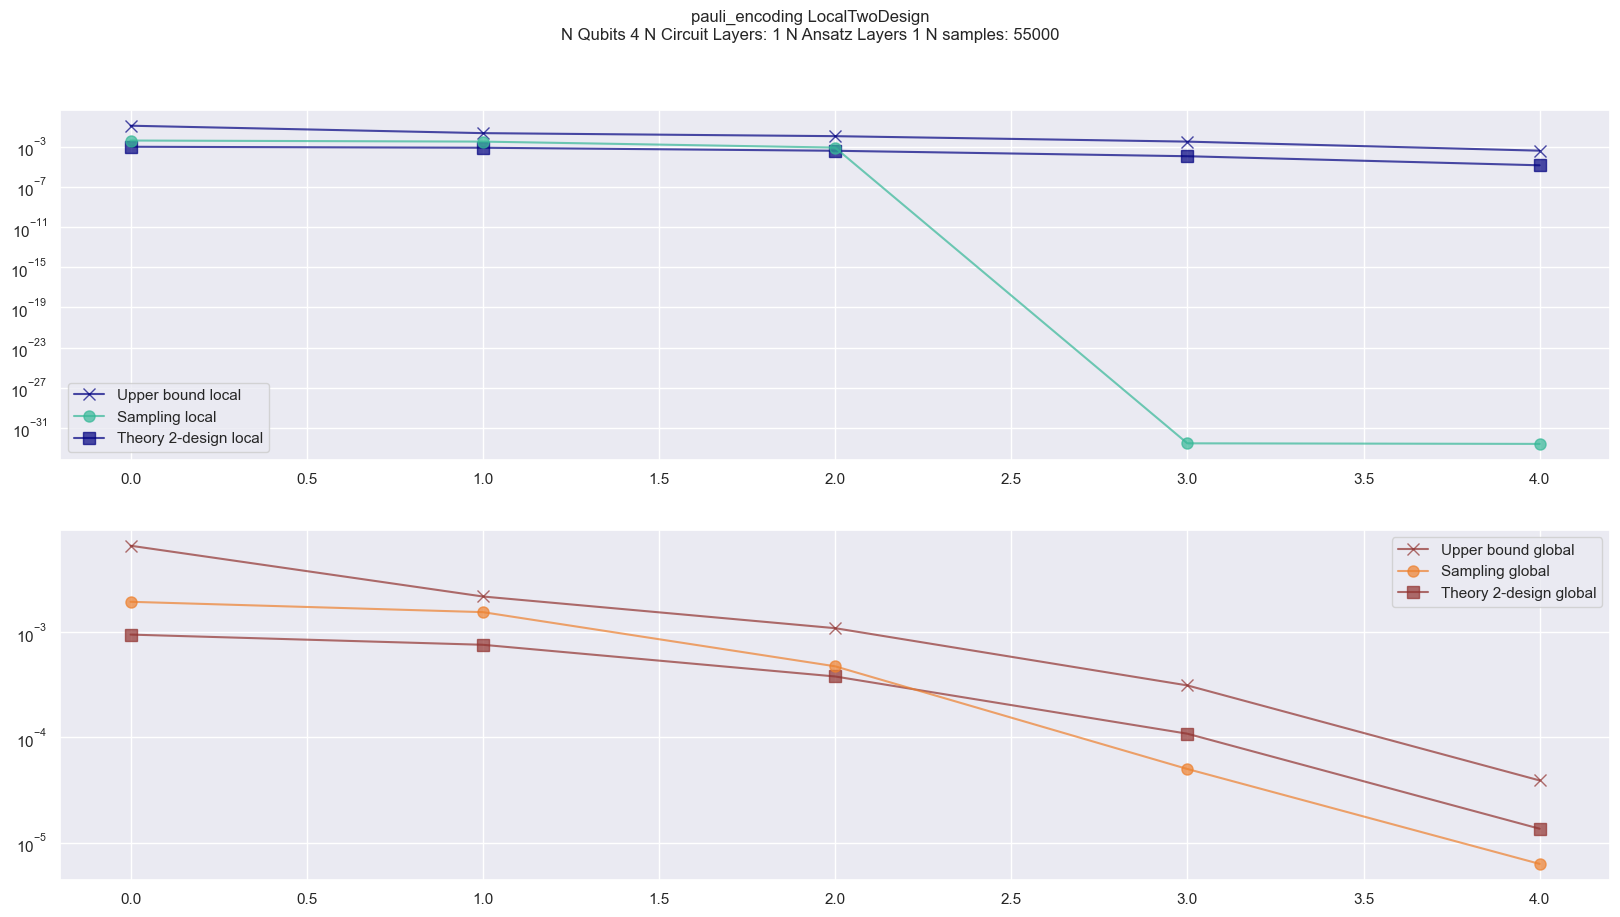

In [3]:
# Presets
plot_upper_bound = True
plot_zero = True

encoding = "pauli_encoding"
ansatz = "LocalTwoDesign"
n_qubits = 4
n_circuit_layers = 1
n_layers = 1
m_wires = 2
m_subgroups = 2
sub_l = 5
cost_global = "global"
cost_local = "local"

# Check which has the highest values for n_samples  (Supposing it is the same for global and local)

# Read data
save_file_name = "local_global_bound.pdf"
if ansatz == "LocalTwoDesign":
    folder_path_template = "../logs/{encoding}/{ansatz}_{cost}_qubits_{n_qubits:02}_m_{m_wires:02}_subgroups_{m_subgroups:02}_circ_layers_{n_circuit_layers:02}_periodic_layers_{n_layers:02}_subperiodic_layers_{sub_l:02}/"
    file_path_template = "../logs/{encoding}/{ansatz}_{cost}_qubits_{n_qubits:02}_m_{m_wires:02}_subgroups_{m_subgroups:02}_circ_layers_{n_circuit_layers:02}_periodic_layers_{n_layers:02}_subperiodic_layers_{sub_l:02}/{n_samples:05}_samples/{file_name}" 
    save_path_template = "../Figures/{encoding}_{ansatz}_qubits_{n_qubits:02}_m_{m_wires:02}_subgroups_{m_subgroups:02}_circ_layers_{n_circuit_layers:02}_periodic_layers_{n_layers:02}_subperiodic_layers_{sub_l:02}_{n_samples:05}_samples_{file_name}" 
    
    
    path = folder_path_template.format(encoding=encoding, ansatz=ansatz, cost=cost_global, n_qubits=n_qubits, m_wires=m_wires, m_subgroups=m_subgroups, n_circuit_layers=n_circuit_layers, n_layers=n_layers, sub_l=sub_l)
    samples_folders = [int(folder[:5]) for folder in os.listdir(path) if folder.endswith("_samples")]
    n_samples = max(samples_folders)
    
    # upper-bound
    upper_bound_global = np.load(file_path_template.format(encoding=encoding, ansatz=ansatz, cost=cost_global, n_qubits=n_qubits,m_wires=m_wires, m_subgroups=m_subgroups, n_circuit_layers=n_circuit_layers, n_layers=n_layers,sub_l=sub_l, n_samples=n_samples, file_name="abs_coeffs_upper_bound.npy"))
    upper_bound_local = np.load(file_path_template.format(encoding=encoding, ansatz=ansatz, cost=cost_local, n_qubits=n_qubits,m_wires=m_wires,m_subgroups=m_subgroups, n_circuit_layers=n_circuit_layers, n_layers=n_layers, n_samples=n_samples,sub_l=sub_l, file_name="abs_coeffs_upper_bound.npy"))
    # theoretical value for 2 design
    var_theory_local = np.load(file_path_template.format(encoding=encoding, ansatz=ansatz, cost=cost_local, n_qubits=n_qubits,m_wires=m_wires,m_subgroups=m_subgroups, n_circuit_layers=n_circuit_layers, n_layers=n_layers, n_samples=n_samples,sub_l=sub_l, file_name="abs_coeffs_theory.npy"))
    var_theory_global = np.load(file_path_template.format(encoding=encoding, ansatz=ansatz, cost=cost_global, n_qubits=n_qubits,m_wires=m_wires,m_subgroups=m_subgroups, n_circuit_layers=n_circuit_layers, n_layers=n_layers, n_samples=n_samples,sub_l=sub_l, file_name="abs_coeffs_theory.npy"))
    # epsilon
    epsilon_local = np.load(file_path_template.format(encoding=encoding, ansatz=ansatz, cost=cost_local, n_qubits=n_qubits,m_wires=m_wires,m_subgroups=m_subgroups, n_circuit_layers=n_circuit_layers, n_layers=n_layers, n_samples=n_samples,sub_l=sub_l, file_name="epsilon_no_enc.npy"))
    epsilon_global = np.load(file_path_template.format(encoding=encoding, ansatz=ansatz, cost=cost_global, n_qubits=n_qubits,m_wires=m_wires,m_subgroups=m_subgroups, n_circuit_layers=n_circuit_layers, n_layers=n_layers, n_samples=n_samples,sub_l=sub_l, file_name="epsilon_no_enc.npy"))
    # freqs
    freqs = np.load(file_path_template.format(encoding=encoding, ansatz=ansatz, cost=cost_global, n_qubits=n_qubits,m_wires=m_wires,m_subgroups=m_subgroups, n_circuit_layers=n_circuit_layers, n_layers=n_layers, n_samples=n_samples,sub_l=sub_l, file_name="freqs.npy"))
    # sampling
    var_global = np.load(file_path_template.format(encoding=encoding, ansatz=ansatz, cost=cost_global, n_qubits=n_qubits,m_wires=m_wires,m_subgroups=m_subgroups, n_circuit_layers=n_circuit_layers, n_layers=n_layers, n_samples=n_samples,sub_l=sub_l, file_name="abs_coeffs_var.npy"))
    var_local = np.load(file_path_template.format(encoding=encoding, ansatz=ansatz, cost=cost_local, n_qubits=n_qubits,m_wires=m_wires,m_subgroups=m_subgroups, n_circuit_layers=n_circuit_layers, n_layers=n_layers, n_samples=n_samples,sub_l=sub_l, file_name="abs_coeffs_var.npy"))

else:
    folder_path_template = "../logs/{encoding}/{ansatz}_{cost}_qubits_{n_qubits:02}_circ_layers_{n_circuit_layers:02}_periodic_layers_{n_layers:02}/"
    file_path_template = "../logs/{encoding}/{ansatz}_{cost}_qubits_{n_qubits:02}_circ_layers_{n_circuit_layers:02}_periodic_layers_{n_layers:02}/{n_samples:05}_samples/{file_name}"
    save_path_template = "../Figures/{encoding}_{ansatz}_qubits_{n_qubits:02}_circ_layers_{n_circuit_layers:02}_periodic_layers_{n_layers:02}_{n_samples:05}_samples_{file_name}" 
    
    path = folder_path_template.format(encoding=encoding, ansatz=ansatz, cost=cost_global, n_qubits=n_qubits, n_circuit_layers=n_circuit_layers, n_layers=n_layers)
    samples_folders = [int(folder[:5]) for folder in os.listdir(path) if folder.endswith("_samples")]
    n_samples = max(samples_folders)

    # upper-bound
    upper_bound_global = np.load(file_path_template.format(encoding=encoding, ansatz=ansatz, cost=cost_global, n_qubits=n_qubits, n_circuit_layers=n_circuit_layers, n_layers=n_layers, n_samples=n_samples, file_name="abs_coeffs_upper_bound.npy"),allow_pickle=True)
    upper_bound_local = np.load(file_path_template.format(encoding=encoding, ansatz=ansatz, cost=cost_local, n_qubits=n_qubits, n_circuit_layers=n_circuit_layers, n_layers=n_layers, n_samples=n_samples, file_name="abs_coeffs_upper_bound.npy"),allow_pickle=True)
    # theoretical value for 2 design
    var_theory_local = np.load(file_path_template.format(encoding=encoding, ansatz=ansatz, cost=cost_local, n_qubits=n_qubits, n_circuit_layers=n_circuit_layers, n_layers=n_layers, n_samples=n_samples, file_name="abs_coeffs_theory.npy"),allow_pickle=True)
    var_theory_global = np.load(file_path_template.format(encoding=encoding, ansatz=ansatz, cost=cost_global, n_qubits=n_qubits, n_circuit_layers=n_circuit_layers, n_layers=n_layers, n_samples=n_samples, file_name="abs_coeffs_theory.npy"),allow_pickle=True)
    # epsilon
    epsilon_local = np.load(file_path_template.format(encoding=encoding, ansatz=ansatz, cost=cost_local, n_qubits=n_qubits, n_circuit_layers=n_circuit_layers, n_layers=n_layers, n_samples=n_samples, file_name="epsilon_no_enc.npy"),allow_pickle=True)
    epsilon_global = np.load(file_path_template.format(encoding=encoding, ansatz=ansatz, cost=cost_global, n_qubits=n_qubits, n_circuit_layers=n_circuit_layers, n_layers=n_layers, n_samples=n_samples, file_name="epsilon_no_enc.npy"),allow_pickle=True)
    # freqs
    freqs = np.load(file_path_template.format(encoding=encoding, ansatz=ansatz, cost=cost_global, n_qubits=n_qubits, n_circuit_layers=n_circuit_layers, n_layers=n_layers, n_samples=n_samples, file_name="freqs.npy"),allow_pickle=True)
    # sampling
    var_global = np.load(file_path_template.format(encoding=encoding, ansatz=ansatz, cost=cost_global, n_qubits=n_qubits, n_circuit_layers=n_circuit_layers, n_layers=n_layers, n_samples=n_samples, file_name="abs_coeffs_var.npy"),allow_pickle=True)
    var_local = np.load(file_path_template.format(encoding=encoding, ansatz=ansatz, cost=cost_local, n_qubits=n_qubits, n_circuit_layers=n_circuit_layers, n_layers=n_layers, n_samples=n_samples, file_name="abs_coeffs_var.npy"),allow_pickle=True)
print("shape",upper_bound_global.shape)
# Plot 
sns.set(style="darkgrid")

# Create a figure with two subplots
fig, (ax_local, ax_global) = plt.subplots(2, 1, figsize=(20, 10))

# Local Plot
ax_local.set_yscale("log")
ax_local.plot(freqs, upper_bound_local, marker="x", color='navy', label="Upper bound local", alpha=0.7, zorder=1, markersize=8)
ax_local.plot(freqs, var_local, marker="o", color="#35b897", label="Sampling local", alpha=0.7, zorder=2, markersize=8)
ax_local.plot(freqs, var_theory_local, marker="s", color='navy', label="Theory 2-design local", alpha=0.7, zorder=1, markersize=8)
ax_local.legend()

# Global Plot
ax_global.set_yscale("log")
ax_global.plot(freqs, upper_bound_global, marker="x", color="#91322f", label="Upper bound global", alpha=0.7, zorder=1, markersize=8)
ax_global.plot(freqs, var_global, marker="o", color="#ed802d", label="Sampling global", alpha=0.7, zorder=2, markersize=8)
ax_global.plot(freqs, var_theory_global, marker="s", color="#91322f", label="Theory 2-design global", alpha=0.7, zorder=1, markersize=8)
ax_global.legend()

# Setting the overall title for the figure
plt.suptitle(encoding + " " + ansatz + "\n" + "N Qubits " + str(n_qubits) + " N Circuit Layers: " + str(n_circuit_layers) + " N Ansatz Layers " + str(n_layers) + " N samples: " + str(n_samples), fontsize=12)

# Save and show
#plt.savefig(save_path_template.format(encoding=encoding, ansatz=ansatz, cost=cost_global, n_qubits=n_qubits, n_circuit_layers=n_circuit_layers, n_layers=n_layers, n_samples=n_samples, file_name=save_file_name), bbox_inches='tight')
plt.show()
 
 



In [4]:
import os

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Presets
plot_upper_bound = True
plot_zero = True

encoding = "pauli_encoding"
ansatz = "LocalTwoDesign"
n_qubits = 4
n_circuit_layers = 1
n_layers = 1
m_wires_list = [1, 2, 4]
m_subgroups_list = [4, 2, 1]
sub_l = 5
cost_global = "global"
cost_local = "local"
folder_path_template = "../logs/{encoding}/{ansatz}_{cost}_qubits_{n_qubits:02}_m_{m_wires:02}_subgroups_{m_subgroups:02}_circ_layers_{n_circuit_layers:02}_periodic_layers_{n_layers:02}_subperiodic_layers_{sub_l:02}/"
file_path_template = "../logs/{encoding}/{ansatz}_{cost}_qubits_{n_qubits:02}_m_{m_wires:02}_subgroups_{m_subgroups:02}_circ_layers_{n_circuit_layers:02}_periodic_layers_{n_layers:02}_subperiodic_layers_{sub_l:02}/{n_samples:05}_samples/{file_name}"
save_path_template = "../Figures/{encoding}_{ansatz}_qubits_{n_qubits:02}_m_{m_wires:02}_subgroups_{m_subgroups:02}_circ_layers_{n_circuit_layers:02}_periodic_layers_{n_layers:02}_subperiodic_layers_{sub_l:02}_{n_samples:05}_samples_{file_name}"


path = folder_path_template.format(
    encoding=encoding,
    ansatz=ansatz,
    cost=cost_global,
    n_qubits=n_qubits,
    m_wires=m_wires,
    m_subgroups=m_subgroups,
    n_circuit_layers=n_circuit_layers,
    n_layers=n_layers,
    sub_l=sub_l,
)
samples_folders = [
    int(folder[:5]) for folder in os.listdir(path) if folder.endswith("_samples")
]
n_samples = max(samples_folders)

# upper-bound
global_upper_bound_small, global_upper_bound_medium, global_upper_bound_large = (
    np.load(
        file_path_template.format(
            encoding=encoding,
            ansatz=ansatz,
            cost=cost_global,
            n_qubits=n_qubits,
            m_wires=m_wires,
            m_subgroups=m_subgroups,
            n_circuit_layers=n_circuit_layers,
            n_layers=n_layers,
            sub_l=sub_l,
            n_samples=n_samples,
            file_name="abs_coeffs_upper_bound.npy",
        )
    )
    for m_wires, m_subgroups in zip(m_wires_list, m_subgroups_list)
)
local_upper_bound_small, local_upper_bound_medium, local_upper_bound_large = (
    np.load(
        file_path_template.format(
            encoding=encoding,
            ansatz=ansatz,
            cost=cost_local,
            n_qubits=n_qubits,
            m_wires=m_wires,
            m_subgroups=m_subgroups,
            n_circuit_layers=n_circuit_layers,
            n_layers=n_layers,
            sub_l=sub_l,
            n_samples=n_samples,
            file_name="abs_coeffs_upper_bound.npy",
        )
    )
    for m_wires, m_subgroups in zip(m_wires_list, m_subgroups_list)
)

# upper-bound quad
(
    global_upper_bound_quad_small,
    global_upper_bound_quad_medium,
    global_upper_bound_quad_large,
) = (
    np.load(
        file_path_template.format(
            encoding=encoding,
            ansatz=ansatz,
            cost=cost_global,
            n_qubits=n_qubits,
            m_wires=m_wires,
            m_subgroups=m_subgroups,
            n_circuit_layers=n_circuit_layers,
            n_layers=n_layers,
            sub_l=sub_l,
            n_samples=n_samples,
            file_name="abs_coeffs_upper_bound_quad.npy",
        )
    )
    for m_wires, m_subgroups in zip(m_wires_list, m_subgroups_list)
)
(
    local_upper_bound_quad_small,
    local_upper_bound_quad_medium,
    local_upper_bound_quad_large,
) = (
    np.load(
        file_path_template.format(
            encoding=encoding,
            ansatz=ansatz,
            cost=cost_local,
            n_qubits=n_qubits,
            m_wires=m_wires,
            m_subgroups=m_subgroups,
            n_circuit_layers=n_circuit_layers,
            n_layers=n_layers,
            sub_l=sub_l,
            n_samples=n_samples,
            file_name="abs_coeffs_upper_bound_quad.npy",
        )
    )
    for m_wires, m_subgroups in zip(m_wires_list, m_subgroups_list)
)

# theoretical value for 2 design
(
    global_var_theory_small,
    global_var_theory_medium,
    global_var_theory_large,
) = (
    np.load(
        file_path_template.format(
            encoding=encoding,
            ansatz=ansatz,
            cost=cost_global,
            n_qubits=n_qubits,
            m_wires=m_wires,
            m_subgroups=m_subgroups,
            n_circuit_layers=n_circuit_layers,
            n_layers=n_layers,
            n_samples=n_samples,
            sub_l=sub_l,
            file_name="abs_coeffs_theory.npy",
        )
    )
    for m_wires, m_subgroups in zip(m_wires_list, m_subgroups_list)
)
(
    local_var_theory_small,
    local_var_theory_medium,
    local_var_theory_large,
) = (
    np.load(
        file_path_template.format(
            encoding=encoding,
            ansatz=ansatz,
            cost=cost_local,
            n_qubits=n_qubits,
            m_wires=m_wires,
            m_subgroups=m_subgroups,
            n_circuit_layers=n_circuit_layers,
            n_layers=n_layers,
            n_samples=n_samples,
            sub_l=sub_l,
            file_name="abs_coeffs_theory.npy",
        )
    )
    for m_wires, m_subgroups in zip(m_wires_list, m_subgroups_list)
)

# epsilon
epsilon_small, epsilon_medium, epsilon_large = (
    np.load(
        file_path_template.format(
            encoding=encoding,
            ansatz=ansatz,
            cost=cost_local,
            n_qubits=n_qubits,
            m_wires=m_wires,
            m_subgroups=m_subgroups,
            n_circuit_layers=n_circuit_layers,
            n_layers=n_layers,
            n_samples=n_samples,
            sub_l=sub_l,
            file_name="epsilon_no_enc.npy",
        )
    )
    for m_wires, m_subgroups in zip(m_wires_list, m_subgroups_list)
)
# freqs
freqs = np.load(
    file_path_template.format(
        encoding=encoding,
        ansatz=ansatz,
        cost=cost_global,
        n_qubits=n_qubits,
        m_wires=m_wires,
        m_subgroups=m_subgroups,
        n_circuit_layers=n_circuit_layers,
        n_layers=n_layers,
        n_samples=n_samples,
        sub_l=sub_l,
        file_name="freqs.npy",
    )
)
# sampling
global_var_small, global_var_medium, global_var_large = (
    np.load(
        file_path_template.format(
            encoding=encoding,
            ansatz=ansatz,
            cost=cost_global,
            n_qubits=n_qubits,
            m_wires=m_wires,
            m_subgroups=m_subgroups,
            n_circuit_layers=n_circuit_layers,
            n_layers=n_layers,
            n_samples=n_samples,
            sub_l=sub_l,
            file_name="abs_coeffs_var.npy",
        )
    )
    for m_wires, m_subgroups in zip(m_wires_list, m_subgroups_list)
)
local_var_small, local_var_medium, local_var_large = (
    np.load(
        file_path_template.format(
            encoding=encoding,
            ansatz=ansatz,
            cost=cost_local,
            n_qubits=n_qubits,
            m_wires=m_wires,
            m_subgroups=m_subgroups,
            n_circuit_layers=n_circuit_layers,
            n_layers=n_layers,
            n_samples=n_samples,
            sub_l=sub_l,
            file_name="abs_coeffs_var.npy",
        )
    )
    for m_wires, m_subgroups in zip(m_wires_list, m_subgroups_list)
)

In [5]:
import matplotlib.ticker as ticker

formatter = ticker.ScalarFormatter(useOffset=True, useMathText=True)
formatter.set_scientific(True)
formatter.set_powerlimits((-3, 3))

Python(67955) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(67956) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(67957) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


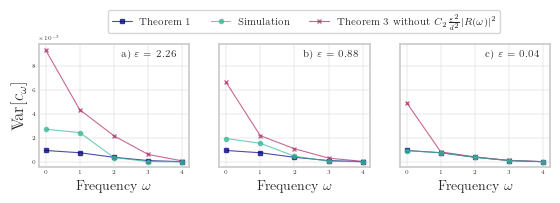

In [6]:
# Create a figure with shared y-axis
sns.set(style="whitegrid")
matplotlib.rcParams.update(
    {
        "pgf.preamble": (
            r"\usepackage{amsmath} \usepackage{dsfont}  \newcommand{\Var}{\operatorname{\mathds{V}\!ar}}"
        ),
        "pgf.texsystem": "pdflatex",
        "font.family": "serif",
        "text.usetex": True,
        "pgf.rcfonts": False,
    }
)
matplotlib.rcParams["text.latex.preamble"] = (
    r"\usepackage{amsmath} \usepackage{dsfont}  \newcommand{\Var}{\operatorname{\mathds{V}\!ar}}"
)
label_fontsize = 10
legend_fontsize = 7
epsilon_fontsize = 7
linewidth = 0.8
markersize = 3
text_fontsize = 11
ticks_fontsize = 4

fig, axs = plt.subplots(1, 3, figsize=(6.6, 1.6), sharey=True)


# First subplot
axs[0].set_ylabel(r"$\Var[c_\omega]$")
axs[0].set_xlabel(r"Frequency $\omega$", fontsize=label_fontsize)
axs[0].plot(
    freqs,
    global_upper_bound_small,
    marker="x",
    color="#AF2A63",
    label="Upper bound global",
    alpha=0.7,
    zorder=1,
    markersize=markersize,
    linewidth=linewidth,
)
axs[0].plot(
    freqs,
    global_var_small,
    marker="o",
    color="#35b897",
    label="Sampling global",
    alpha=0.7,
    zorder=2,
    markersize=markersize,
    linewidth=linewidth,
)
axs[0].plot(
    freqs,
    global_var_theory_small,
    marker="s",
    color="navy",
    label="Theory 2-design global",
    alpha=0.7,
    zorder=1,
    markersize=markersize,
    linewidth=linewidth,
)

# Second subplot
axs[1].set_xlabel(r"Frequency $\omega$", fontsize=label_fontsize)
axs[1].plot(
    freqs,
    global_upper_bound_medium,
    marker="x",
    color="#AF2A63",
    label="Upper bound global",
    alpha=0.7,
    zorder=1,
    markersize=markersize,
    linewidth=linewidth,
)
axs[1].plot(
    freqs,
    global_var_medium,
    marker="o",
    color="#35b897",
    label="Sampling global",
    alpha=0.7,
    zorder=2,
    markersize=markersize,
    linewidth=linewidth,
)
axs[1].plot(
    freqs,
    global_var_theory_medium,
    marker="s",
    color="navy",
    label="Theory 2-design global",
    alpha=0.7,
    zorder=1,
    markersize=markersize,
    linewidth=linewidth,
)

# Third subplot
axs[2].set_xlabel(r"Frequency $\omega$", fontsize=label_fontsize)
axs[2].plot(
    freqs,
    global_var_theory_large,
    marker="s",
    color="navy",
    label=r"Theorem 1",
    alpha=0.7,
    zorder=1,
    markersize=markersize,
    linewidth=linewidth,
)
axs[2].plot(
    freqs,
    global_var_large,
    marker="o",
    color="#35b897",
    label="Simulation",
    alpha=0.7,
    zorder=2,
    markersize=markersize,
    linewidth=linewidth,
)
axs[2].plot(
    freqs,
    global_upper_bound_large,
    marker="x",
    color="#AF2A63",
    label=r"Theorem 3 without $C_2\frac{\varepsilon^2}{d^2}|R(\omega)|^2$",
    alpha=0.7,
    zorder=1,
    markersize=markersize,
    linewidth=linewidth,
)

# Add legend to the last subplot
axs[2].legend(fontsize=legend_fontsize, bbox_to_anchor=(0.7, 1.32), ncol=3)
axs[0].grid(linewidth=0.3)
axs[1].grid(linewidth=0.3)
axs[2].grid(linewidth=0.3)

axs[0].tick_params(axis="both", which="major", labelsize=ticks_fontsize, pad=-4)
axs[0].tick_params(axis="both", which="minor", labelsize=ticks_fontsize - 2)
axs[1].tick_params(axis="both", which="major", labelsize=ticks_fontsize, pad=-4)
axs[1].tick_params(axis="both", which="minor", labelsize=ticks_fontsize - 2, pad=-4)
axs[2].tick_params(axis="both", which="major", labelsize=ticks_fontsize, pad=-4)
axs[2].tick_params(axis="both", which="minor", labelsize=ticks_fontsize - 2)

axs[0].xaxis.set_major_locator(MaxNLocator(integer=True))
axs[1].xaxis.set_major_locator(MaxNLocator(integer=True))
axs[2].xaxis.set_major_locator(MaxNLocator(integer=True))

axs[0].yaxis.get_offset_text().set_fontsize(ticks_fontsize)
axs[1].yaxis.get_offset_text().set_fontsize(ticks_fontsize)
axs[2].yaxis.get_offset_text().set_fontsize(ticks_fontsize)

formatter.set_scientific(True)
formatter.set_powerlimits((-3, 3))
axs[0].yaxis.set_major_formatter(formatter)
axs[1].yaxis.set_major_formatter(formatter)
axs[2].yaxis.set_major_formatter(formatter)
fig.text(
    0.25,
    0.8,
    r"a) $\varepsilon$" + " = " + "{:.2f}".format(epsilon_small),
    fontsize=epsilon_fontsize,
)
fig.text(
    0.525,
    0.8,
    r"b) $\varepsilon$" + " = " + "{:.2f}".format(epsilon_medium),
    fontsize=epsilon_fontsize,
)
fig.text(
    0.801,
    0.8,
    r"c) $\varepsilon$" + " = " + "{:.2f}".format(epsilon_large),
    fontsize=epsilon_fontsize,
)
# plt.tight_layout()
plt.savefig("figs_numerics/figC.pgf", bbox_inches="tight")
plt.show()

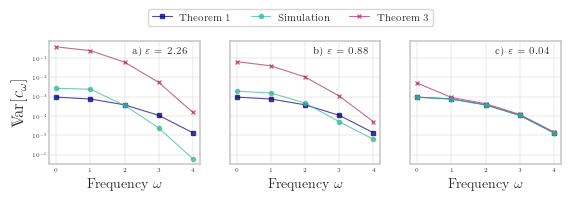

In [13]:
# Create a figure with shared y-axis
sns.set(style="whitegrid")
matplotlib.rcParams.update(
    {
        "pgf.preamble": (
            r"\usepackage{amsmath} \usepackage{dsfont}  \newcommand{\Var}{\operatorname{\mathds{V}\!ar}}"
        ),
        "pgf.texsystem": "pdflatex",
        "font.family": "serif",
        "text.usetex": True,
        "pgf.rcfonts": False,
    }
)
matplotlib.rcParams["text.latex.preamble"] = (
    r"\usepackage{amsmath} \usepackage{dsfont}  \newcommand{\Var}{\operatorname{\mathds{V}\!ar}}"
)
label_fontsize = 10
legend_fontsize = 7
epsilon_fontsize = 7
linewidth = 0.8
markersize = 3
text_fontsize = 11
ticks_fontsize = 4

fig, axs = plt.subplots(1, 3, figsize=(6.6, 1.6),sharey=True)


# First subplot
axs[0].set_ylabel(r"$\Var[c_\omega]$")
axs[0].set_xlabel(r"Frequency $\omega$", fontsize=label_fontsize)
# axs[0].plot(freqs, global_upper_bound_small, marker="x", color='navy', label="Upper bound global", alpha=0.7, zorder=1, markersize=markersize, linewidth=linewidth)
axs[0].plot(
    freqs,
    global_var_small,
    marker="o",
    color="#35b897",
    label="Sampling global",
    alpha=0.7,
    zorder=2,
    markersize=markersize,
    linewidth=linewidth,
)
axs[0].plot(
    freqs,
    global_var_theory_small,
    marker="s",
    color="navy",
    label="Theory 2-design global",
    alpha=0.7,
    zorder=1,
    markersize=markersize,
    linewidth=linewidth,
)
axs[0].plot(
    freqs,
    global_upper_bound_quad_small,
    marker="x",
    color="#AF2A63",
    label="Upper bound global",
    alpha=0.7,
    zorder=1,
    markersize=markersize,
    linewidth=linewidth,
    #linestyle="dashed",
)

# Second subplot
axs[1].set_xlabel(r"Frequency $\omega$", fontsize=label_fontsize)
# axs[1].plot(freqs, global_upper_bound_medium, marker="x", color='navy', label="Upper bound global", alpha=0.7, zorder=1, markersize=markersize, linewidth=linewidth)
axs[1].plot(
    freqs,
    global_var_medium,
    marker="o",
    color="#35b897",
    label="Sampling global",
    alpha=0.7,
    zorder=2,
    markersize=markersize,
    linewidth=linewidth,
)
axs[1].plot(
    freqs,
    global_var_theory_medium,
    marker="s",
    color="navy",
    label="Theorem  ",
    alpha=0.7,
    zorder=1,
    markersize=markersize,
    linewidth=linewidth,
)
axs[1].plot(
    freqs,
    global_upper_bound_quad_medium,
    marker="x",
    color="#AF2A63",
    label="Theorem   ",
    alpha=0.7,
    zorder=1,
    markersize=markersize,
    linewidth=linewidth,
    #linestyle="dashed",
)

# Third subplot
axs[2].set_xlabel(r"Frequency $\omega$", fontsize=label_fontsize)
# axs[2].plot(freqs, global_upper_bound_large, marker="x", color='navy', label="Upper bound", alpha=0.7, zorder=1, markersize=markersize, linewidth=linewidth)
axs[2].plot(
    freqs,
    global_var_theory_large,
    marker="s",
    color="navy",
    label="Theorem 1",
    alpha=0.7,
    zorder=1,
    markersize=markersize,
    linewidth=linewidth,
)
axs[2].plot(
    freqs,
    global_var_large,
    marker="o",
    color="#35b897",
    label="Simulation",
    alpha=0.7,
    zorder=2,
    markersize=markersize,
    linewidth=linewidth,
)
axs[2].plot(
    freqs,
    global_upper_bound_quad_large,
    marker="x",
    color="#AF2A63",
    label="Theorem 3",
    alpha=0.7,
    zorder=1,
    markersize=markersize,
    linewidth=linewidth,
    #linestyle="dashed",
)
# Add legend to the last subplot
axs[2].legend(fontsize=legend_fontsize, bbox_to_anchor=(0.18, 1.3), ncol=4)
axs[0].grid(linewidth=0.3)
axs[1].grid(linewidth=0.3)
axs[2].grid(linewidth=0.3)

axs[0].tick_params(axis="both", which="major", labelsize=ticks_fontsize, pad=-4)
axs[0].tick_params(axis="both", which="minor", labelsize=ticks_fontsize - 2)
axs[1].tick_params(axis="both", which="major", labelsize=ticks_fontsize, pad=-4)
axs[1].tick_params(axis="both", which="minor", labelsize=ticks_fontsize - 2, pad=-4)
axs[2].tick_params(axis="both", which="major", labelsize=ticks_fontsize, pad=-4)
axs[2].tick_params(axis="both", which="minor", labelsize=ticks_fontsize - 2)

axs[0].xaxis.set_major_locator(MaxNLocator(integer=True))
axs[1].xaxis.set_major_locator(MaxNLocator(integer=True))
axs[2].xaxis.set_major_locator(MaxNLocator(integer=True))

axs[0].yaxis.get_offset_text().set_fontsize(ticks_fontsize)
axs[1].yaxis.get_offset_text().set_fontsize(ticks_fontsize)
axs[2].yaxis.get_offset_text().set_fontsize(ticks_fontsize)

formatter.set_scientific(True)
formatter.set_powerlimits((-3, 3))
axs[0].yaxis.set_major_formatter(formatter)
axs[1].yaxis.set_major_formatter(formatter)
axs[2].yaxis.set_major_formatter(formatter)
axs[0].set_yscale("log")
axs[1].set_yscale("log")
axs[2].set_yscale("log")
#axs[0].set_ylim(top=100)
fig.text(
    0.25,
    0.8,
    r"a) $\varepsilon$" + " = " + "{:.2f}".format(epsilon_small),
    fontsize=epsilon_fontsize,
)
fig.text(
    0.525,
    0.8,
    r"b) $\varepsilon$" + " = " + "{:.2f}".format(epsilon_medium),
    fontsize=epsilon_fontsize,
)
fig.text(
    0.801,
    0.8,
    r"c) $\varepsilon$" + " = " + "{:.2f}".format(epsilon_large),
    fontsize=epsilon_fontsize,
)
# plt.tight_layout()
plt.savefig("figs_numerics/figC_quad.pgf", bbox_inches="tight")
plt.show()

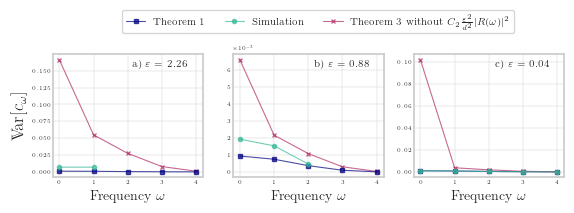

In [15]:
color_simu = "#35b897"
color_bound = "#AF2A63"
color_theo = "navy"
# Create a figure with shared y-axis
sns.set(style="whitegrid")
matplotlib.rcParams.update(
    {
        "pgf.preamble": (
            r"\usepackage{amsmath} \usepackage{dsfont}  \newcommand{\Var}{\operatorname{\mathds{V}\!ar}}"
        ),
        "pgf.texsystem": "pdflatex",
        "font.family": "serif",
        "text.usetex": True,
        "pgf.rcfonts": False,
    }
)
matplotlib.rcParams["text.latex.preamble"] = (
    r"\usepackage{amsmath} \usepackage{dsfont}  \newcommand{\Var}{\operatorname{\mathds{V}\!ar}}"
)
label_fontsize = 10
legend_fontsize = 7
epsilon_fontsize = 7
linewidth = 0.8
markersize = 3
text_fontsize = 11
ticks_fontsize = 4

fig, axs = plt.subplots(1, 3, figsize=(6.6, 1.6))  # , sharey=True)
color_local_bound = "#91322f"
color_local_simul = "#ed802d"
color_upper = "#44AF82"

# First subplot
condition_small = local_var_small > 10 ** (-30)
axs[0].set_ylabel(r"$\Var[c_\omega]$")
axs[0].set_xlabel(r"Frequency $\omega$", fontsize=label_fontsize)
axs[0].plot(
    freqs,
    local_upper_bound_small,
    marker="x",
    color=color_bound,
    label="Upper bound local",
    alpha=0.7,
    zorder=1,
    markersize=markersize,
    linewidth=linewidth,
)
axs[0].plot(
    freqs[condition_small],
    local_var_small[condition_small],
    marker="o",
    color=color_simu,
    label="Sampling local",
    alpha=0.7,
    zorder=2,
    markersize=markersize,
    linewidth=linewidth,
)
axs[0].plot(
    freqs,
    local_var_theory_small,
    marker="s",
    color=color_theo,
    label="Theory 2-design local",
    alpha=0.7,
    zorder=1,
    markersize=markersize,
    linewidth=linewidth,
)


# Second subplot
condition_medium = local_var_medium > 10 ** (-30)
axs[1].set_xlabel(r"Frequency $\omega$", fontsize=label_fontsize)
axs[1].plot(
    freqs,
    global_upper_bound_medium,
    marker="x",
    color=color_bound,
    label="Upper bound local",
    alpha=0.7,
    zorder=1,
    markersize=markersize,
    linewidth=linewidth,
)
axs[1].plot(
    freqs[condition_medium],
    global_var_medium[condition_medium],
    marker="o",
    color=color_simu,
    label="Sampling local",
    alpha=0.7,
    zorder=2,
    markersize=markersize,
    linewidth=linewidth,
)
axs[1].plot(
    freqs,
    global_var_theory_medium,
    marker="s",
    color=color_theo,
    label="Theory 2-design local",
    alpha=0.7,
    zorder=1,
    markersize=markersize,
    linewidth=linewidth,
)

# Third subplot
condition_large = local_var_large > 10 ** (-30)
axs[2].set_xlabel(r"Frequency $\omega$", fontsize=label_fontsize)
axs[2].plot(
    freqs,
    local_var_theory_large,
    marker="s",
    color=color_theo,
    label="Theorem 1",
    alpha=0.7,
    zorder=1,
    markersize=markersize,
    linewidth=linewidth,
)
axs[2].plot(
    freqs[condition_large],
    local_var_large[condition_large],
    marker="o",
    color=color_simu,
    label="Simulation",
    alpha=0.7,
    zorder=2,
    markersize=markersize,
    linewidth=linewidth,
)
axs[2].plot(
    freqs,
    local_upper_bound_large,
    marker="x",
    color=color_bound,
    label=r"Theorem 3 without $C_2\frac{\varepsilon^2}{d^2}|R(\omega)|^2$",
    alpha=0.7,
    zorder=1,
    markersize=markersize,
    linewidth=linewidth,
)

# Add legend to the last subplot
axs[2].legend(fontsize=legend_fontsize, bbox_to_anchor=(0.7, 1.4), ncol=3)
axs[0].grid(linewidth=0.3)
axs[1].grid(linewidth=0.3)
axs[2].grid(linewidth=0.3)

axs[0].tick_params(axis="both", which="major", labelsize=ticks_fontsize, pad=-4)
axs[0].tick_params(axis="both", which="minor", labelsize=ticks_fontsize - 2)
axs[1].tick_params(axis="both", which="major", labelsize=ticks_fontsize, pad=-4)
axs[1].tick_params(axis="both", which="minor", labelsize=ticks_fontsize - 2, pad=-4)
axs[2].tick_params(axis="both", which="major", labelsize=ticks_fontsize, pad=-4)
axs[2].tick_params(axis="both", which="minor", labelsize=ticks_fontsize - 2)

axs[0].xaxis.set_major_locator(MaxNLocator(integer=True))
axs[1].xaxis.set_major_locator(MaxNLocator(integer=True))
axs[2].xaxis.set_major_locator(MaxNLocator(integer=True))

axs[0].yaxis.get_offset_text().set_fontsize(ticks_fontsize)
axs[1].yaxis.get_offset_text().set_fontsize(ticks_fontsize)
axs[2].yaxis.get_offset_text().set_fontsize(ticks_fontsize)

formatter.set_scientific(True)
formatter.set_powerlimits((-3, 3))
axs[0].yaxis.set_major_formatter(formatter)
axs[1].yaxis.set_major_formatter(formatter)
axs[2].yaxis.set_major_formatter(formatter)
fig.text(
    0.246,
    0.8,
    r"a) $\varepsilon$" + " = " + "{:.2f}".format(epsilon_small),
    fontsize=epsilon_fontsize,
)
fig.text(
    0.521,
    0.8,
    r"b) $\varepsilon$" + " = " + "{:.2f}".format(epsilon_medium),
    fontsize=epsilon_fontsize,
)
fig.text(
    0.795,
    0.8,
    r"c) $\varepsilon$" + " = " + "{:.2f}".format(epsilon_large),
    fontsize=epsilon_fontsize,
)
# plt.tight_layout()
plt.savefig("figs_numerics/Bound_local.pgf", bbox_inches="tight")
plt.show()

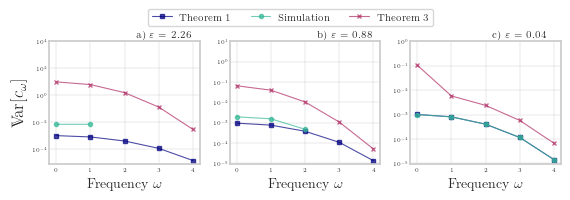

In [28]:
# Create a figure with shared y-axis
sns.set(style="whitegrid")
matplotlib.rcParams.update(
    {
        "pgf.preamble": (
            r"\usepackage{amsmath} \usepackage{dsfont}  \newcommand{\Var}{\operatorname{\mathds{V}\!ar}}"
        ),
        "pgf.texsystem": "pdflatex",
        "font.family": "serif",
        "text.usetex": True,
        "pgf.rcfonts": False,
    }
)
matplotlib.rcParams["text.latex.preamble"] = (
    r"\usepackage{amsmath} \usepackage{dsfont}  \newcommand{\Var}{\operatorname{\mathds{V}\!ar}}"
)
label_fontsize = 10
legend_fontsize = 7
epsilon_fontsize = 7
linewidth = 0.8
markersize = 3
text_fontsize = 11
ticks_fontsize = 4


fig, axs = plt.subplots(1, 3, figsize=(6.6, 1.6))
color_local_bound = "#91322f"
color_local_simul = "#ed802d"

# First subplot
condition_small = local_var_small > 10 ** (-30)
axs[0].set_ylabel(r"$\Var[c_\omega]$")
axs[0].set_xlabel(r"Frequency $\omega$", fontsize=label_fontsize)
axs[0].plot(
    freqs[condition_small],
    local_var_small[condition_small],
    marker="o",
    color=color_simu,
    label="Sampling local",
    alpha=0.7,
    zorder=2,
    markersize=markersize,
    linewidth=linewidth,
)
axs[0].plot(
    freqs,
    local_var_theory_small,
    marker="s",
    color=color_theo,
    label="Theory 2-design local",
    alpha=0.7,
    zorder=1,
    markersize=markersize,
    linewidth=linewidth,
)
axs[0].plot(
    freqs,
    local_upper_bound_quad_small,
    marker="x",
    color=color_bound,
    label="Quadratic Upper bound local",
    alpha=0.7,
    zorder=1,
    markersize=markersize,
    linewidth=linewidth,
    #linestyle="dashed",
)


# Second subplot
condition_medium = local_var_medium > 10 ** (-30)
axs[1].set_xlabel(r"Frequency $\omega$", fontsize=label_fontsize)
axs[1].plot(
    freqs[condition_medium],
    global_var_medium[condition_medium],
    marker="o",
    color=color_simu,
    label="Sampling local",
    alpha=0.7,
    zorder=2,
    markersize=markersize,
    linewidth=linewidth,
)
axs[1].plot(
    freqs,
    global_var_theory_medium,
    marker="s",
    color=color_theo,
    label="Theory 2-design local",
    alpha=0.7,
    zorder=1,
    markersize=markersize,
    linewidth=linewidth,
)
axs[1].plot(
    freqs,
    global_upper_bound_quad_medium,
    marker="x",
    color=color_bound,
    label="Quadratic Upper bound local",
    alpha=0.7,
    zorder=1,
    markersize=markersize,
    linewidth=linewidth,
    #linestyle="dashed",
)


# Third subplot
condition_large = local_var_large > 10 ** (-30)
axs[2].set_xlabel(r"Frequency $\omega$", fontsize=label_fontsize)
axs[2].plot(
    freqs,
    local_var_theory_large,
    marker="s",
    color=color_theo,
    label="Theorem 1",
    alpha=0.7,
    zorder=1,
    markersize=markersize,
    linewidth=linewidth,
)
axs[2].plot(
    freqs[condition_large],
    local_var_large[condition_large],
    marker="o",
    color=color_simu,
    label="Simulation",
    alpha=0.7,
    zorder=2,
    markersize=markersize,
    linewidth=linewidth,
)

axs[2].plot(
    freqs,
    local_upper_bound_quad_large,
    marker="x",
    color=color_bound,
    label="Theorem 3",
    alpha=0.7,
    zorder=1,
    markersize=markersize,
    linewidth=linewidth,
    #linestyle="dashed",
)
axs[0].set_yscale("log")
axs[1].set_yscale("log")
axs[2].set_yscale("log")
# Add legend to the last subplot
axs[2].legend(fontsize=legend_fontsize, bbox_to_anchor=(0.18, 1.3), ncol=4)
axs[0].grid(linewidth=0.3)
axs[1].grid(linewidth=0.3)
axs[2].grid(linewidth=0.3)

axs[0].tick_params(axis="both", which="major", labelsize=ticks_fontsize, pad=-4)
axs[0].tick_params(axis="both", which="minor", labelsize=ticks_fontsize - 2)
axs[1].tick_params(axis="both", which="major", labelsize=ticks_fontsize, pad=-4)
axs[1].tick_params(axis="both", which="minor", labelsize=ticks_fontsize - 2, pad=-4)
axs[2].tick_params(axis="both", which="major", labelsize=ticks_fontsize, pad=-4)
axs[2].tick_params(axis="both", which="minor", labelsize=ticks_fontsize - 2)

axs[0].xaxis.set_major_locator(MaxNLocator(integer=True))
axs[1].xaxis.set_major_locator(MaxNLocator(integer=True))
axs[2].xaxis.set_major_locator(MaxNLocator(integer=True))

axs[0].yaxis.get_offset_text().set_fontsize(ticks_fontsize)
axs[1].yaxis.get_offset_text().set_fontsize(ticks_fontsize)
axs[2].yaxis.get_offset_text().set_fontsize(ticks_fontsize)

axs[0].set_ylim(top=10000)
axs[1].set_ylim(top=10)
axs[2].set_ylim(top=1)
formatter.set_scientific(True)
#formatter.set_powerlimits((-3, 3))
#axs[0].yaxis.set_major_formatter(formatter)
#axs[1].yaxis.set_major_formatter(formatter)
#axs[2].yaxis.set_major_formatter(formatter)
fig.text(
    0.256,
    0.9,
    r"a) $\varepsilon$" + " = " + "{:.2f}".format(epsilon_small),
    fontsize=epsilon_fontsize,
)
fig.text(
    0.531,
    0.9,
    r"b) $\varepsilon$" + " = " + "{:.2f}".format(epsilon_medium),
    fontsize=epsilon_fontsize,
)
fig.text(
    0.795,
    0.9,
    r"c) $\varepsilon$" + " = " + "{:.2f}".format(epsilon_large),
    fontsize=epsilon_fontsize,
)
# plt.tight_layout()
plt.savefig("figs_numerics/Bound_local_quad.pgf", bbox_inches="tight")
plt.show()